# ASTR496: Fundamentals of Data Science
## Week 3 In class exercise solutions - Part 1
#### Gautham Narayan <gsn@illinois.edu>

This notebook steps through the in class exercises during Week 2.
You are not required to do things this way, and indeed by the end of the semester, you'll probably have your own favorite ways to do things. That's totally OK.

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib ipympl

Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Modeling multivariate data. 

Moments alone do not fully characterize a distribution, and while you can always characterize data by computing sample means and variances, assuming that the data can be modeled by a standard normal because you can compute the mean and variance is right out.

This trap is often what leads to model misspecification. 

There are tests to check if distributions actually agree, but the single most important take away from this notebook, and indeed from this week is this:

### LOOK AT YOUR DATA

---

Load sample_stats.csv (pandas or astropy.table)

You’ll find multiple bivariate datasets

Estimate the sample mean and sample standard deviation for each 

Now plot them… (matplotlib/seaborn)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('sample_stats.csv')
df

,idx,x,y
0,0,72.509328,39.540130
1,0,65.970857,72.744856
2,0,21.778040,6.616625
3,0,67.759796,72.421202
4,0,78.617195,52.575257
...,...,...,...
1841,9,35.667316,30.522035
1842,9,48.442300,30.501723
1843,9,58.669373,30.506838
1844,9,34.800701,30.497931


In [5]:
# the multiple bivariate distributions are indexed by idx
# we'll get the unique list of these
keys = set(df['idx'])
print(keys)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [6]:
# so there's 13 datasets. 
# Let's estimate the sample mean and variance for each
# we can even do the sample correlation coefficient 
for key in keys:
    ind = df['idx'] == key
    mean_x = df['x'][ind].mean()
    mean_y = df['y'][ind].mean()
    std_x = df['x'][ind].std()
    std_y = df['y'][ind].std()
    corr = np.corrcoef(df['x'][ind], y = df['y'][ind])[0][1]
    
    # this is an example of using python f-strings for formatting
    # it's just so much cleaner
    print(f'Dataset {key:02d} {mean_x:.3f} {mean_y:.3f} {std_x:.3f} {std_y:.3f} {corr:.3f} ')



Dataset 00 54.266 47.835 16.770 26.940 -0.064 
Dataset 01 54.270 47.837 16.770 26.938 -0.069 
Dataset 02 54.263 47.832 16.765 26.935 -0.064 
Dataset 03 54.267 47.840 16.769 26.930 -0.063 
Dataset 04 54.268 47.836 16.767 26.936 -0.069 
Dataset 05 54.260 47.840 16.768 26.930 -0.060 
Dataset 06 54.267 47.832 16.770 26.938 -0.067 
Dataset 07 54.266 47.831 16.769 26.939 -0.069 
Dataset 08 54.269 47.831 16.769 26.936 -0.069 
Dataset 09 54.261 47.830 16.766 26.940 -0.062 
Dataset 10 54.267 47.838 16.760 26.930 -0.068 
Dataset 11 54.269 47.835 16.767 26.940 -0.069 
Dataset 12 54.260 47.840 16.770 26.930 -0.066 


Now the mean and variance of these distributions are in great agreement across both covariates.

This might tempt you to think the distributions are largely similar.

But let's look at the data.

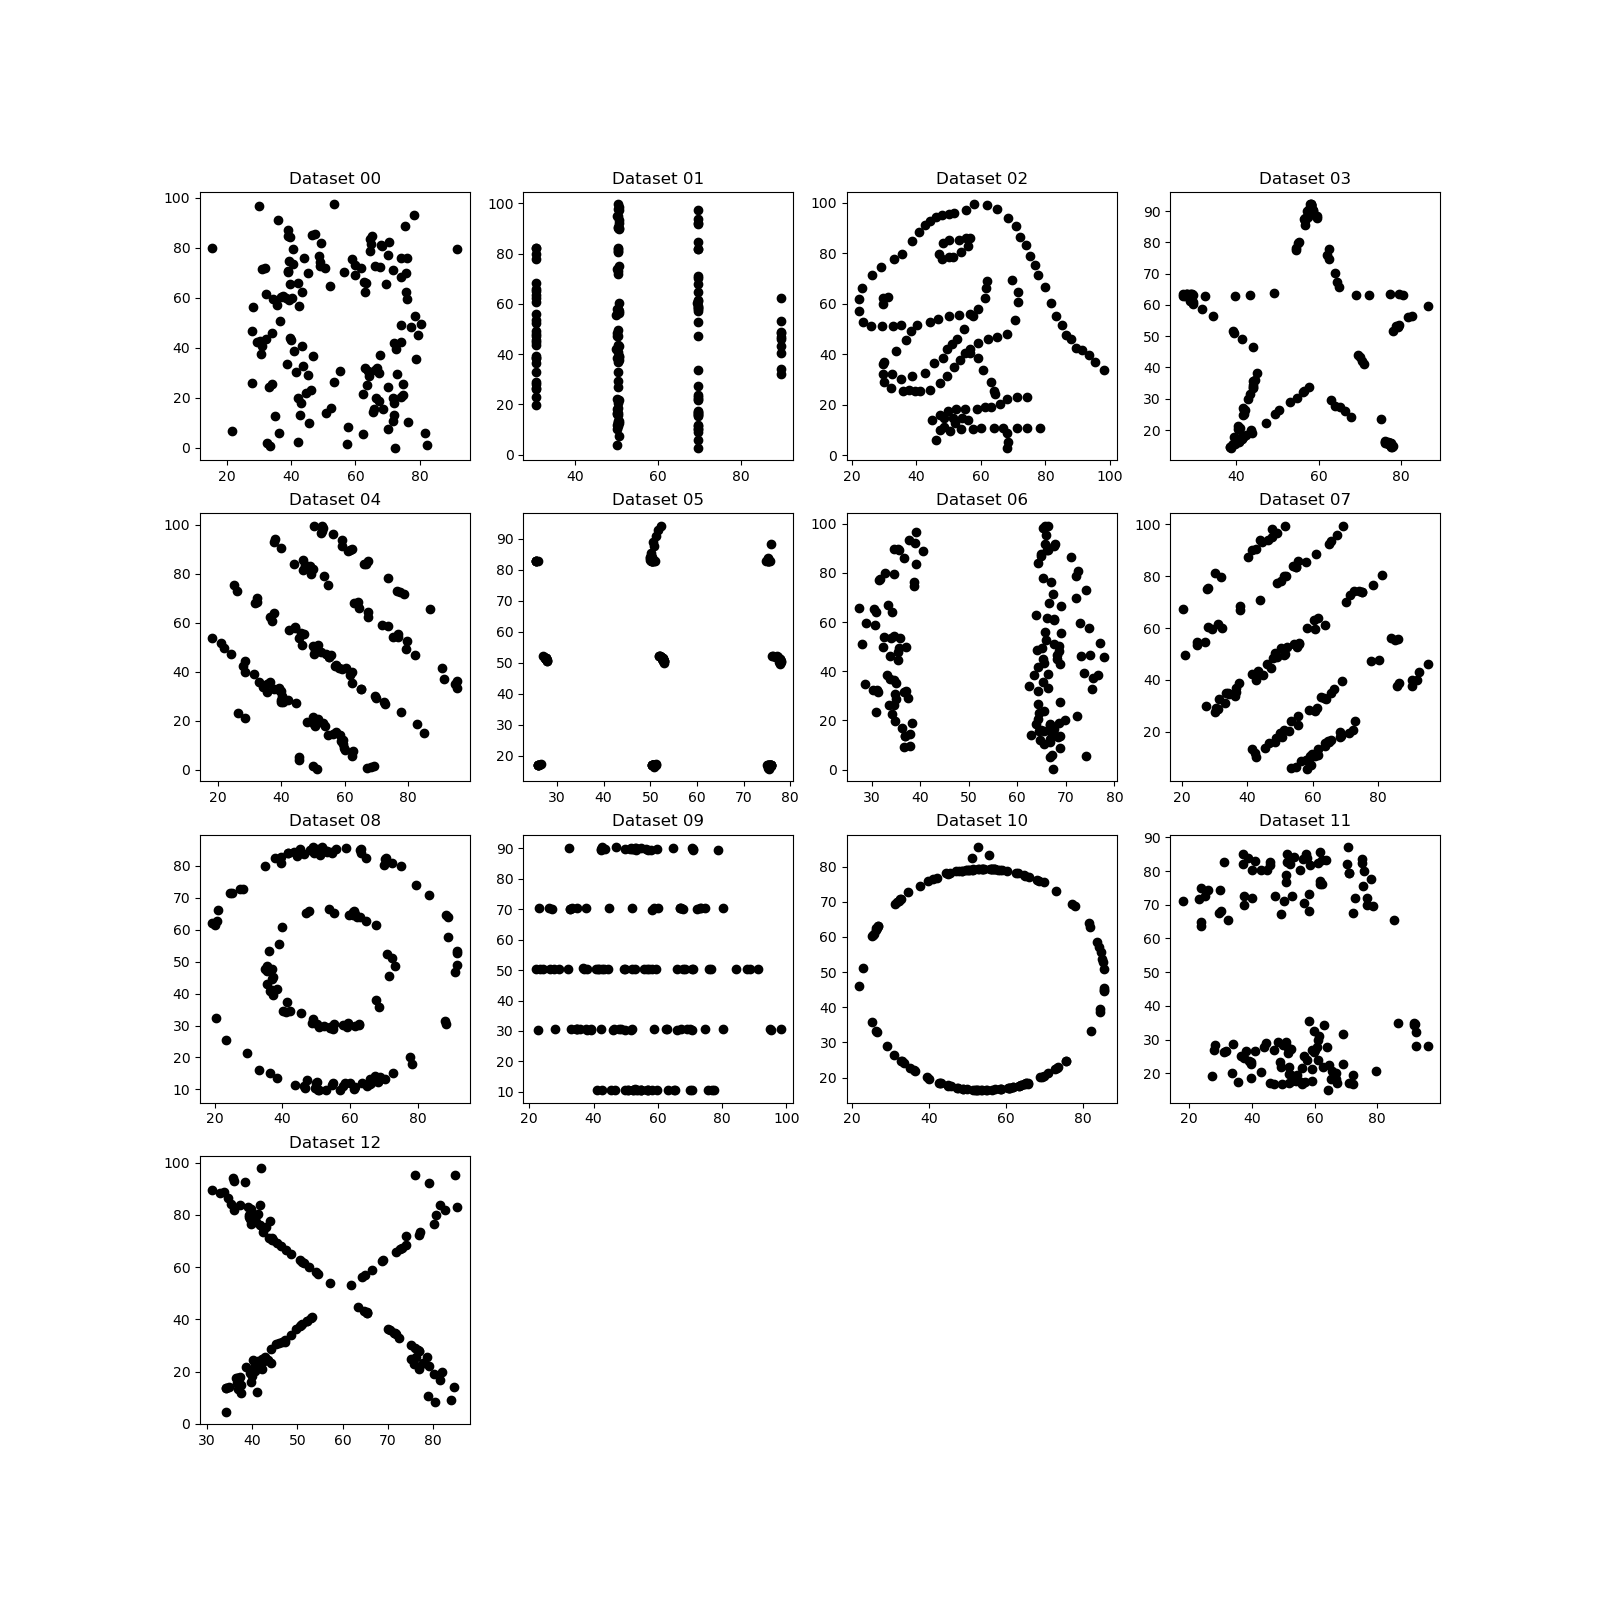

In [7]:
fig = figure(figsize=(16,16))
for key in keys:
    ind = df['idx'] == key
    ax = fig.add_subplot(4,4, key+1)
    ax.scatter(df['x'][ind], df['y'][ind], marker='o', color='k')
    ax.set_title(f'Dataset {key:02d}')

This is the DataSaurus!

You can read more about it here, including how it was generated. 
https://www.autodeskresearch.com/publications/samestats

So we need better ways of quickly deciding if distributions agree with each other, rather than just simple moments.